# 1. What is Desicion Tree

decision Tree (ต้นไม้ตัดสินใจ) เป็นอัลกอริทึ่มที่ถูกจัดอยู่ใน Supervised Learning ซึ่งเรียนรู้จาก Attribute (คุณลักษณะของข้อมูล) โดยจะนำมาใช้กับ
* Classification
* Regression

แต่ในบทนี้จะนำมาใช้กับ Classification

# 1.1 Basic Decision Tree

สร้างระบบคัดแยก Lemon , Orange (0, 1) โดยใช้ ขนาดของผล เป็น Attribute (Feature)

In [290]:
# Data Set
X = [[27],
     [35],
     [39],
     [21],
     [22],
     [45]]
# X คือ Feature หรือคุณลักษณะเด่น หรือ Input
y_names = ['lemon','orange','orange','lemon','lemon','orange']
y = [0, 1, 1, 0, 0, 1] # y คือ Class / Target / Label หรือ Output

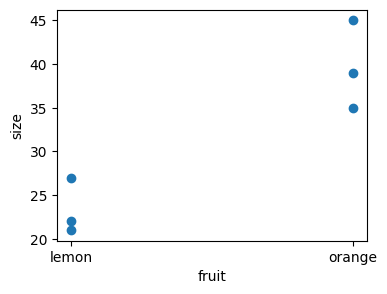

In [291]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (4, 3))

plt.xlabel('fruit')
plt.ylabel('size')

plt.scatter(y_names, X)
plt.show()


# 2. DecisionTreeClassifier

In [292]:
# Create
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [293]:
# Train
DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = None,
                       max_features = None, max_leaf_nodes = None,
                       min_impurity_decrease = 0.0, min_samples_split = 2,
                       min_weight_fraction_leaf = 0.0, random_state = None,
                       splitter = 'best') 

DecisionTreeClassifier()

In [294]:
# Predict
data = [[25]]
y_pred = model.predict(data)

y_pred 

array([0])

In [295]:
print('Result :', y_pred[0])

Result : 0


In [296]:
class_names = ['lemon', 'orange']

In [297]:
data = [[35]]
y_pred = model.predict(data)

prd = class_names[y_pred[0]]
print('Result : {}'. format(prd))

Result : orange


In [298]:
data = [[36],
        [28],
        [30],
        [23]]
y_pred = model.predict(data)

print('Result :')

for i in y_pred:
    print(class_names[i])

Result :
orange
lemon
lemon
lemon


## 2.1 Tree structure

In [299]:
from sklearn.tree import plot_tree

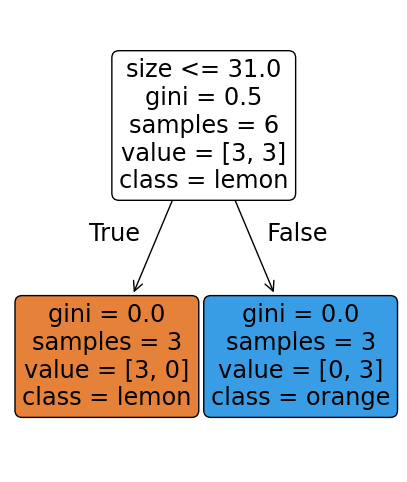

In [300]:
plt.figure(figsize=(5, 6))
plot_tree(model, filled = True, feature_names = ['size'], 
          class_names = ['lemon', 'orange'], rounded = True)
plt.show()

Diagram Meaning
1. size <= 31.0 
    * ค่าที่ใช้เป็นเกณฑ์ในการตัดแบ่งช่วง คล้ายกับ If-Else
2. gini = 0.5
    * เป็นอัลกอรึทึ่มที่ใช้ในการคำนวณแบ่งแยกกลุ่ม โดยใช้ size เป็น root ในการแบ่งกลุ่ม ซึ่ง 0.5 นั้นเป็นค่าดัชนี
    * gini ค่ามากแสดงว่ากลุ่มข้อมูลมีการปะปนกัน ถ้าค่าเป็น 0 แสดงว่าเป็นกลุ่มเดียวกันหมด เช่น ข้อมูลทั้งหมดเป็น lemon
3. sample = 6
    * จำนวนข้อมูลที่นำมา Train มีทั้งหมด 6 จำนวน
4. values = [.. , ..]
    * ตัวเลขที่แสดงว่าแบ่งได้ฝั่งละกี่ค่า จากไดอะแกรมได้ฝั่งละ 3
5. class
    * ผลการทำนายว่าเป็นผลอะไร

## Add Class

In [301]:
X = [[27], [35], [39], [21], [22], [45], [102], [110],[121]]
y_names = ['lemon','orange','orange','lemon','lemon','orange', 
           'pomelo','pomelo','pomelo']
y = [0, 1, 1, 0, 0, 1, 2, 2, 2]

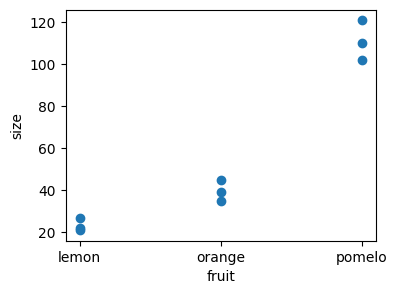

In [302]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (4, 3))

plt.xlabel('fruit')
plt.ylabel('size')

plt.scatter(y_names, X)
plt.show()

In [303]:
# Create
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [304]:
# Train
DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = None,
                       max_features = None, max_leaf_nodes = None,
                       min_impurity_decrease = 0.0, min_samples_split = 2,
                       min_weight_fraction_leaf = 0.0, random_state = None,
                       splitter = 'best') 

DecisionTreeClassifier()

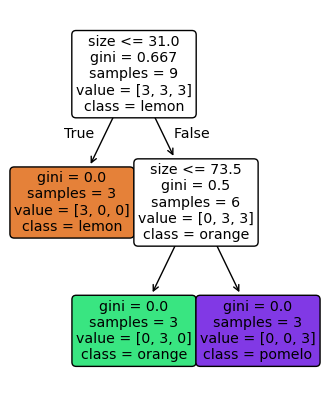

In [305]:
from sklearn.tree import plot_tree

plt.figure(figsize = (4, 5))
plot_tree(model, filled = True, feature_names = ['size'], 
          class_names = ['lemon', 'orange','pomelo'], rounded = True)
plt.show()

# 3. Label Encoder

โมเดลการเข้ารหัสเพื่อแปลงค่า
```
y_names = ['lemon','orange','orange','lemon','lemon','orange','pomelo','pomelo','pomelo']
```
ให้เป็น
```
y = [0, 1, 1, 0, 0, 1, 2, 2, 2]
```
##### *สำคัญมากเพราะจะต้องนำไปใช้คู่กับ Classification

In [309]:
y_names = ['lemon','orange','orange','lemon','lemon','orange','pomelo','pomelo','pomelo']

In [312]:
from sklearn.preprocessing import LabelEncoder

y_le = LabelEncoder()
y = y_le.fit_transform(y_names)

y

array([0, 1, 1, 0, 0, 1, 2, 2, 2])